<b><font size="5">Figure 2

Sharpness Ratio, Steepness Ratio, and PAC all decreased with medication in PD patients.

<b>Imports

In [72]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
#python packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pac

import seaborn as sns
sns.set_style('white')

import imp
import shape
import utils
imp.reload(utils)

<module 'utils' from '/Users/nick/Documents/brainwaves/Cole_2017-master/utils.py'>

<b> Load data and compute waveform shape metrics and PAC

In [73]:
widthS = 3#parameter for sharpness calulation
Fs, t, S, Sc, flo, fhi = utils.loadmeta()
eeg,rejects = utils.loadPD()
pac = utils.measure_pac(eeg,rejects, flo, fhi, Fs=Fs)
pks,trs,ShR,PTR,StR,RDR = utils.measure_shape(eeg,rejects, widthS=widthS)

/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.ar

Sensorimotor sharpness Ratio (ShR), steepness Ratio (StR), and PAC all decrease with medication (Wilcoxon sign rank, p=0.006, p=0.004, p=0.009, respectively)

In [74]:
#pool C3 and C4 data after metrics are calculated
def pooldata(x):
    z=(x[0:int(len(x)/2)]+x[int(len(x)/2):len(x)])/2
    z=np.array(z,dtype=float)
    return z

pacoff=pooldata(pac['off'])
pacon=pooldata(pac['on'])
pacC=pooldata(pac['C'])

ShRoff=pooldata(ShR['off'])
ShRon=pooldata(ShR['on'])
ShRC=pooldata(ShR['C'])

StRoff=pooldata(StR['off'])
StRon=pooldata(StR['on'])
StRC=pooldata(StR['C'])

print('ShR')
print(sp.stats.wilcoxon(ShRoff,ShRon))
print('StR')
print(sp.stats.wilcoxon(StRoff,StRon))
print('PAC')
print(sp.stats.wilcoxon(pacoff,pacon))  

ShR
WilcoxonResult(statistic=12.0, pvalue=0.0064064902221673695)
StR
WilcoxonResult(statistic=9.0, pvalue=0.003772239574473987)
PAC
WilcoxonResult(statistic=14.0, pvalue=0.008984997655215593)


<b><font size="5">A

Boxplots for each metric

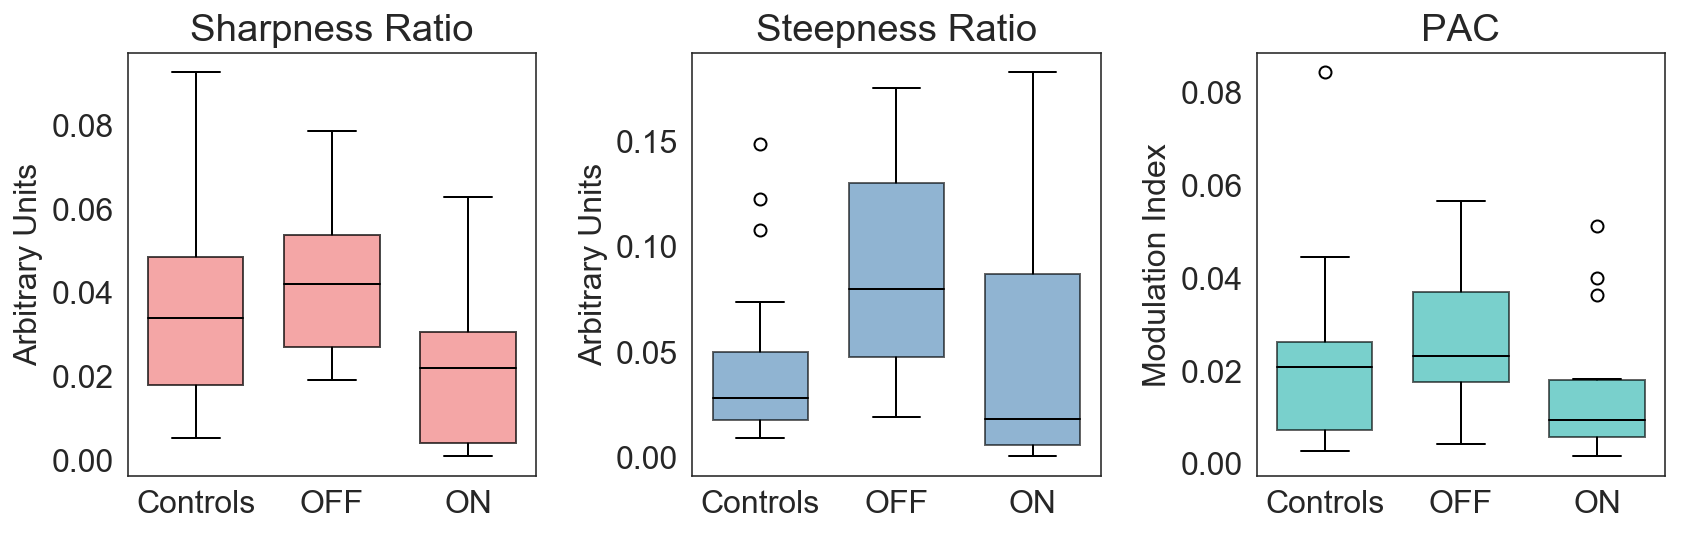

In [50]:
from plt import scatt_2cond
plt.rcParams.update({'font.size': 16})
ShRdata = [ShRC,ShRoff,ShRon,]
StRdata=[StRC,StRoff,StRon]
PACdata=[pacC,pacoff,pacon]

fig=plt.figure(figsize=(12,4))

c1='lightcoral'
c2='steelblue'
c3='lightseagreen'
fig.add_subplot(131)
plt.title('Sharpness Ratio')
plt.ylabel('Arbitrary Units')
plt.boxplot(ShRdata,widths=0.70,patch_artist=True, boxprops=dict(facecolor=c1, alpha=0.7, color='black'), medianprops=dict(color='black'))
plt.xticks([1,2,3],['Controls','OFF','ON'])

fig.add_subplot(132)
plt.title('Steepness Ratio')
plt.ylabel('Arbitrary Units')
plt.boxplot(StRdata,widths=0.70,patch_artist=True, boxprops=dict(facecolor=c2, alpha=0.6, color='black'), medianprops=dict(color='black'))
plt.xticks([1,2,3],['Controls','OFF','ON'])

fig.add_subplot(133)
plt.title('PAC')
plt.ylabel('Modulation Index')
plt.boxplot(PACdata,widths=0.70,patch_artist=True, boxprops=dict(facecolor=c3, alpha=0.6, color='black'), medianprops=dict(color='black'))
plt.xticks([1,2,3],['Controls','OFF','ON'])
plt.tight_layout()

#plt.savefig('Fig1a.eps', format='eps', dpi=1000)

<b><font size="5">B

Scatterplots for each metric

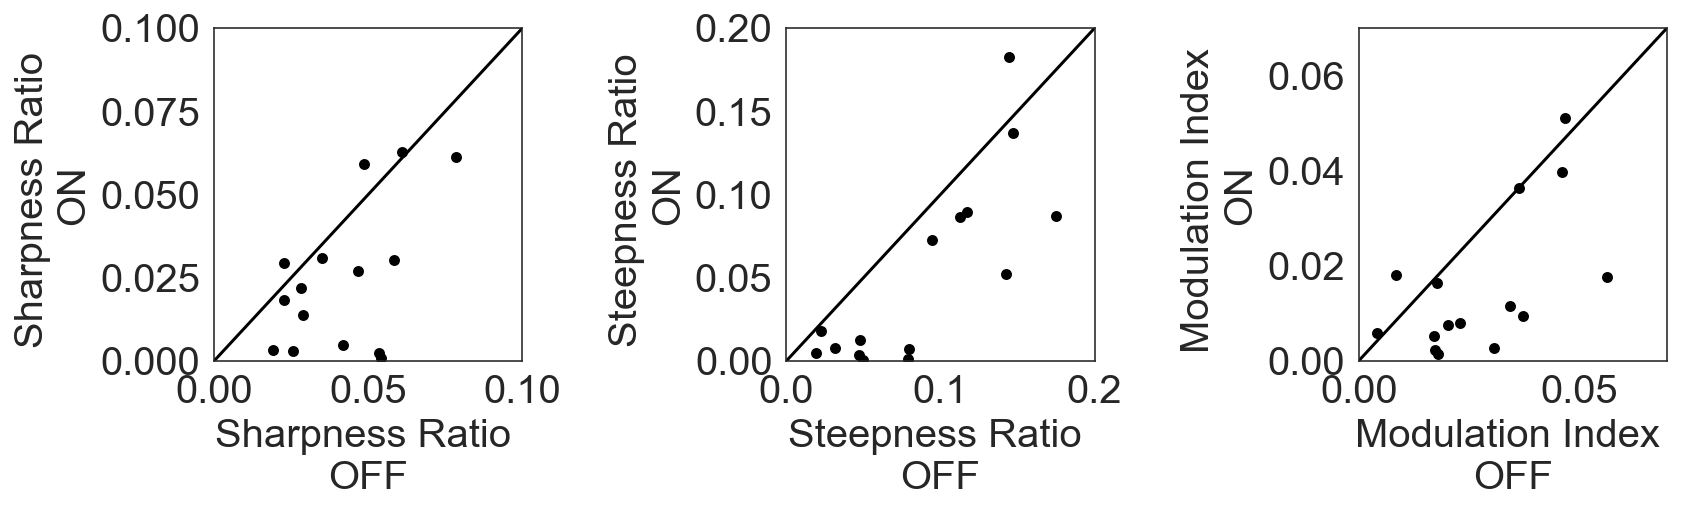

In [8]:
fig=plt.figure(figsize=(12,4))
plt.rcParams.update({'font.size': 20})


fig.add_subplot(131)
plt.scatter(ShRoff,ShRon, s=80, c='black', marker=".")
plt.plot([0,0.1], [0,0.1],c='black')
plt.ylim(0,.1)
plt.xlim(0,.1)
plt.xlabel('Sharpness Ratio \nOFF')
plt.ylabel('Sharpness Ratio \nON')


fig.add_subplot(132)
plt.scatter(StRoff,StRon, s=80, c='black', marker=".")
plt.plot([0,0.2], [0,0.2],c='black')
plt.ylim(0,.2)
plt.xlim(0,.2)
plt.xlabel('Steepness Ratio \nOFF')
plt.ylabel('Steepness Ratio \nON')

fig.add_subplot(133)
plt.scatter(pacoff,pacon, s=80, c='black', marker=".")
plt.plot([0,0.07], [0,0.07],c='black')
plt.ylim(0,.07)
plt.xlim(0,.07)
plt.xlabel('Modulation Index \nOFF')
plt.ylabel('Modulation Index \nON')
plt.tight_layout()
#plt.savefig('Fig1b_.eps', format='eps', dpi=1000)
plt.show()

<b><font size="5">Figure 4

ShR and StR correlate (Spearman) with PAC in both medication states. <br>ShR - off meds: r = 0.69, p = 0.004; on meds: r = 0.74, p = 0.002. <br>StR - off meds: r = 0.71, p = 0.003; on meds: r = 0.64, p = 0.010

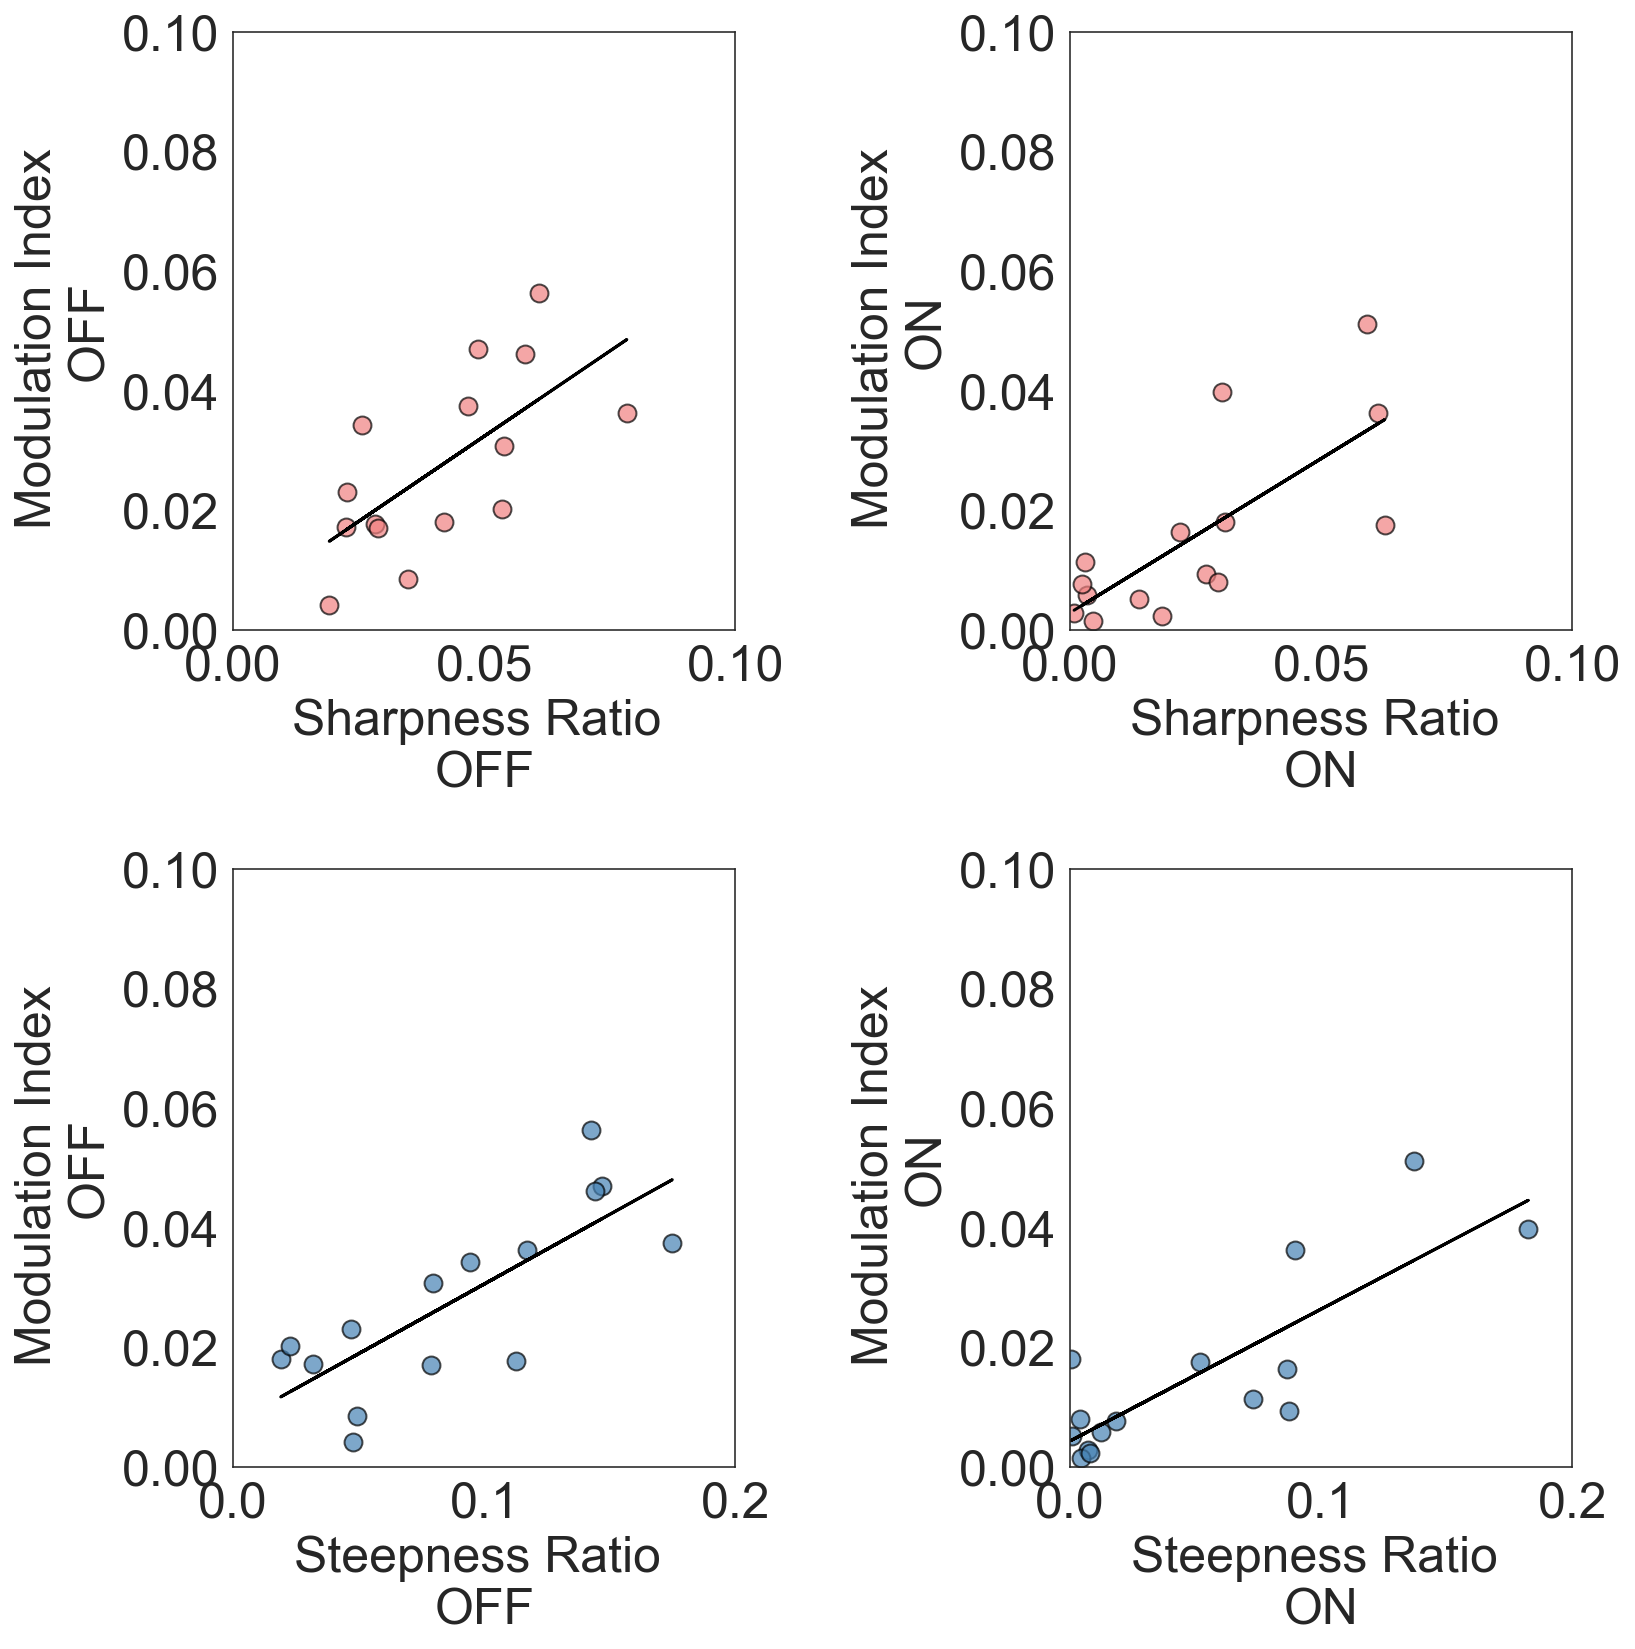

SpearmanrResult(correlation=0.6964285714285713, pvalue=0.003921190506879554)
SpearmanrResult(correlation=0.7392857142857142, pvalue=0.0016355111435407642)
SpearmanrResult(correlation=0.7142857142857142, pvalue=0.0027743838176388096)
SpearmanrResult(correlation=0.6392857142857141, pvalue=0.010288446619594207)


In [60]:
# calculate the trendline
def trendline(x,y):
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)    
    return p(x)

p1=trendline(ShRoff,pacoff)
p2=trendline(ShRon,pacon)
p3=trendline(StRoff,pacoff)
p4=trendline(StRon,pacon)

fig=plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 25})
lw=1
sizes=80
a_=0.7
ShRc='salmon'
StRc='dodgerblue'

fig.add_subplot(221)
plt.scatter(ShRoff,pacoff, c=c1,s=sizes,alpha=a_,linewidths=lw,edgecolors='black', marker="o")
plt.ylim(0,.1)
plt.xlim(0,.1)
plt.plot(ShRoff,p1,c='black')
plt.xlabel('Sharpness Ratio \nOFF')
plt.ylabel('Modulation Index \nOFF')

fig.add_subplot(222)
plt.scatter(ShRon,pacon, c=c1,s=sizes,alpha=a_,linewidths=lw,edgecolors='black', marker="o")
plt.plot(ShRon,p2,c='black')


plt.ylim(0,.1)
plt.xlim(0,.1)
plt.xlabel('Sharpness Ratio \nON')
plt.ylabel('Modulation Index \nON')


fig.add_subplot(223)
plt.scatter(StRoff,pacoff, c=c2,s=sizes,alpha=a_,linewidths=lw,edgecolors='black', marker="o")
plt.plot(StRoff,p3,c='black')

plt.ylim(0,.1)
plt.xlim(0,.2)
plt.xlabel('Steepness Ratio \nOFF')
plt.ylabel('Modulation Index \nOFF')

fig.add_subplot(224)
plt.scatter(StRon,pacon, c=c2,s=sizes,alpha=a_,linewidths=lw,edgecolors='black', marker="o")
plt.plot(StRon,p4,c='black')

plt.ylim(0,.1)
plt.xlim(0,.2)
plt.xlabel('Steepness Ratio \nON')
plt.ylabel('Modulation Index \nON')
plt.tight_layout()
plt.show()

print(sp.stats.spearmanr(ShRoff,pacoff))
print(sp.stats.spearmanr(ShRon,pacon))
print(sp.stats.spearmanr(StRoff,pacoff))
print(sp.stats.spearmanr(StRon,pacon))

<font size="5"><b> Additional statistics

There was no significant difference when comparing PD off medication and controls for ShR (p=0.36) and PAC (p=0.27). However, StR did differentiate these groups (p=0.01)

In [65]:
print('ShR')
print(sp.stats.ranksums(ShRoff,ShRC))
print('StR')
print(sp.stats.ranksums(StRoff,StRC))
print('PAC')
print(sp.stats.ranksums(pacoff,pacC))

ShR
RanksumsResult(statistic=0.909154827298409, pvalue=0.36326840504902125)
StR
RanksumsResult(statistic=2.5298221281347035, pvalue=0.011412036386001651)
PAC
RanksumsResult(statistic=1.1067971810589328, pvalue=0.2683816272927607)
